Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan
#gr(size=(600,600));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64,Float64,Float64,Int64
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at string:15
└ @ Core ./string:15


,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-145.479,-155.111,9.47013e-37
2,140.151,4.0,-143.381,-152.998,7.8313e-36
3,140.302,4.0,-141.311,-150.914,6.29433e-35
4,140.452,4.0,-139.27,-148.859,4.91704e-34
5,140.603,4.0,-137.257,-146.832,3.73331e-33
6,140.754,4.0,-135.272,-144.833,2.75501e-32
7,140.905,4.0,-133.316,-142.863,1.97602e-31
8,141.055,4.0,-131.388,-140.921,1.37751e-30
9,141.206,4.0,-129.489,-139.007,9.33334e-30


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at string:1
└ @ Core string:1


,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,150.854,5.92965,-63.4934,-72.2412,0.925221
2,151.91,5.60804,-63.616,-72.2936,0.878014
3,150.704,6.97487,-64.129,-72.887,0.485041
4,150.402,5.12563,-63.999,-72.7777,0.541078
5,151.005,6.49246,-63.7087,-72.4463,0.753692
6,151.608,5.12563,-63.8105,-72.5079,0.708653
7,149.648,6.17085,-64.169,-73.0005,0.43303
8,153.417,6.41206,-64.8335,-73.4156,0.285897
9,150.854,5.60804,-63.5008,-72.2486,0.918409


### Snippet 4.23

Density of sigma

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at string:1
└ @ Core string:1


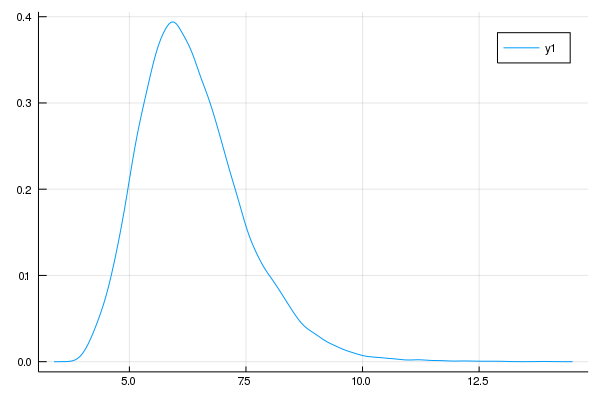

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*